In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [104]:
df = pd.read_csv('data_5K.csv')
df['Level'] = df['Level'].map({'Low':0,'Medium':1,'High':2})
df

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P545,38,1,7,1,6,7,4,1,3,...,3,1,1,1,6,4,3,2,3,1
1,P754,39,1,3,7,7,7,7,6,7,...,4,4,6,2,4,2,3,2,5,2
2,P986,25,1,1,3,3,8,3,2,7,...,7,5,2,4,7,9,2,5,2,1
3,P3,38,1,1,7,4,4,1,3,7,...,1,2,1,5,2,6,1,1,3,1
4,P470,55,2,3,1,3,4,4,2,3,...,4,1,3,2,2,9,1,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,P380,38,1,3,3,7,2,3,7,2,...,1,4,1,6,1,5,3,3,2,1
4996,P119,14,1,2,3,7,2,2,2,3,...,5,2,6,5,2,4,2,2,4,1
4997,P320,32,2,6,8,7,7,7,7,7,...,3,2,6,6,4,4,6,6,2,2
4998,P526,71,1,2,3,7,3,3,3,1,...,3,3,5,2,2,3,2,5,4,0


In [105]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,24].values

In [106]:
# y = np.reshape(y, (10000,1))
# y

In [107]:
# LE = LabelEncoder()
# y = np.array(LE.fit_transform(y))
# y

In [108]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=0)

In [109]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [110]:
#To match the 3 outputs converting output lable shape to 3

from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=3)

In [111]:
print(X_train.shape)
y_train.shape

(4000, 23)


(4000, 3)

In [120]:
 #Adding Input Layer
ann = tf.keras.models.Sequential()

In [121]:
 #Adding Hidden Layer
for _ in range(17):
    ann.add(tf.keras.layers.Dense(units=6,activation="tanh"))


In [122]:
 #Adding Output Layer
ann.add(tf.keras.layers.Dense(units=3,activation="softmax"))

In [123]:
#Compiling ANN
ann.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

In [128]:
#Traning ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
125/125 [==============================] - 1s 4ms/step - loss: 0.3922 - accuracy: 0.8048
Epoch 2/100
125/125 [==============================] - 0s 4ms/step - loss: 0.3904 - accuracy: 0.8095
Epoch 3/100
125/125 [==============================] - 1s 4ms/step - loss: 0.3957 - accuracy: 0.8055
Epoch 4/100
125/125 [==============================] - 1s 5ms/step - loss: 0.3908 - accuracy: 0.8110
Epoch 5/100
125/125 [==============================] - 1s 4ms/step - loss: 0.3972 - accuracy: 0.8037
Epoch 6/100
125/125 [==============================] - 0s 3ms/step - loss: 0.3946 - accuracy: 0.8085
Epoch 7/100
125/125 [==============================] - 1s 5ms/step - loss: 0.3918 - accuracy: 0.8095
Epoch 8/100
125/125 [==============================] - 1s 5ms/step - loss: 0.3916 - accuracy: 0.8087
Epoch 9/100
125/125 [==============================] - 1s 6ms/step - loss: 0.3897 - accuracy: 0.8112
Epoch 10/100
125/125 [==============================] - 1s 4ms/step - loss: 0.3909 - accura

In [129]:
y_pred = ann.predict(X_test)
predictions = np.argmax(y_pred, axis=-1)

32/32 [==============================] - 0s 6ms/step


In [130]:
confusion_matrix(y_test, predictions)

array([[214,  97,   2],
       [121, 185,   3],
       [  0,   9, 369]], dtype=int64)

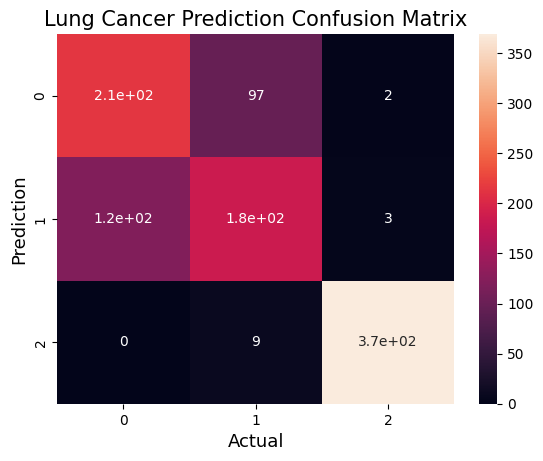

In [131]:
import seaborn as sb
sb.heatmap(confusion_matrix(y_test,predictions),annot = True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Lung Cancer Prediction Confusion Matrix',fontsize=15)
plt.show()